### To run this you should execute those commands:
1. pip install -r requirements.txt
2. dvc pull

In [1]:
import os
import PIL
import math
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

Hi!
Our team has prepared several assignments that are similar to our daily tasks as data scientists. Solve the assignments below. Present the results in the form of report. You can prepare the report in a text document, word document, jupyter notebook or in another way which is convenient for you. Send your code and report via e-mail.


Task 1

In dataset.csv file, there exists dataset_category column. Try to match the existing names to the one of: “clothes”, “underwear” or “other”. Once the matching is done, rename the entries accordingly. Also, consider how to make matching the "Niezidentyfikowano" category. Save the results in csv file after changes. Write in the report how many rows exist for each category.


Task 2

In the “types.csv” file there exist pairs of shoe types. Plot confusion/association matrix and interpret the results. Show the matrix and write your description in the short summary.


Task 3

In the folder 'Images' you can find an exemplary dataset with fashion images. All of the images are of the same size. Perform the following actions:
    
    1. Find the image resolution image and count the number of images in the dataset.
    2. Calculate mean and standard deviation of every channel (RGB) of the images in the dataset. Remember to divide pixel values by 255.0
    3. Resize all the images from folder 'images' to the 256x256 size and save them into 'images_256' folder.
    4. Create function to visualize n random images on the single plot and save the plot  into indicated directory.


You can only use imported packages,
Good luck!

# Task 1

Loading ``dataset.csv`` file 

In [2]:
dataset = pd.read_csv("dataset.csv")
dataset = dataset.drop(columns=["Unnamed: 0"])
dataset.head()

,index,ID,photo_url,name,brand,dataset_category,description
0,0,Y000000001_014_ASOS-,http://images.asos-media.com/inv/media/4/4/0/7...,Emma Jane Maternity B-E Smooth Nursing Bra - B...,Emma Jane,Niezidentyfikowano,"Maternity bra by Emma Jane, Smooth, soft handl..."
1,1,Y000000002_014_ASOS-,http://images.asos-media.com/inv/media/4/3/6/8...,ASOS Mix & Match Lace Underwired DD Bra - Pink,ASOS,Niezidentyfikowano,Lace DD bra by ASOS Collection. Featuring moul...
2,2,Y000000003_014_ASOS-,http://images.asos-media.com/inv/media/1/6/8/6...,Pleasure State Sea Of Dreams Floral Printed Th...,Pleasure State,Niezidentyfikowano,Printed thong by Pleasure State. Featuring an ...
3,3,Y000000004_014_ASOS-,http://images.asos-media.com/inv/media/4/5/8/1...,Made By Niki Strands Bodice Top - Milk & honey,Made by Niki,Niezidentyfikowano,This bustier top from Made by Niki has been ma...
4,4,Y000000005_014_ASOS-,http://images.asos-media.com/inv/media/8/9/2/1...,Scandale Balconette Bra - Charcoal,Scandale,Niezidentyfikowano,This balconette bra by Scandale has been craft...


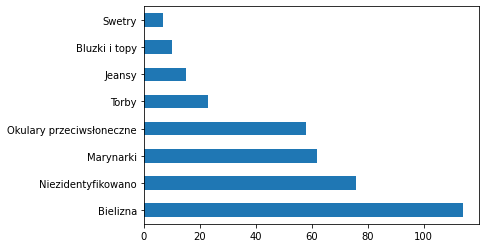

In [3]:
dataset.dataset_category.value_counts().plot(kind="barh")
plt.show()

Values in dataset_category column will be changed according to ```rename_dict``` dictionary

In [4]:
rename_dict = {
    "Bielizna": "underwear",
    "Bluzki i topy": "clothes",
    "Jeansy": "clothes",
    "Marynarki": "clothes",
    "Okulary przeciwsłoneczne": "other",
    "Swetry": "clothes",
    "Torby": "other",
    "Niezidentyfikowano": "Niezidentyfikowano",
}

In [5]:
dataset.dataset_category = dataset.dataset_category.apply(lambda x: rename_dict[x])

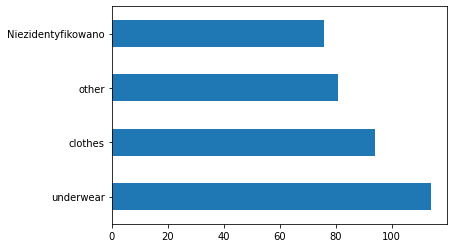

In [6]:
dataset.dataset_category.value_counts().plot(kind="barh")
plt.show()

All rows with ```Niezidentyfikowano``` value in ```dataset_category``` column will be assigned to the  appropriate category according to the key words found in ```description``` column.

In [7]:
keywords_rename_dict = {
    "bra": "underwear",
    "thong": "underwear",
    "pyjamas": "clothes",
    "pyjama": "clothes",
    "briefs": "underwear",
    "top": "clothes",
    "shorts": "clothes",
    "trousers": "clothes",
    "sweatshirt": "clothes",
    "robe": "other",
    "joggers": "clothes"
}

In [8]:
def rename_based_on_description(row, keawords_dict):
    if row.dataset_category is not "Niezidentyfikowano":
        return row
    for k, v in keawords_dict.items():
        if k in row.description.lower():
            row.dataset_category = v
            return row
    return row

In [9]:
dataset = dataset.apply(lambda x: rename_based_on_description(x, keywords_rename_dict), axis=1)

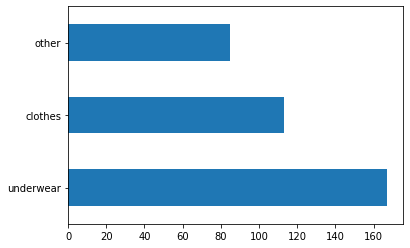

In [10]:
dataset.dataset_category.value_counts().plot(kind="barh")
plt.show()

Saving DataFrame in new csv file.

In [11]:
dataset.to_csv("dataset_edited.csv")

# Task 2

In [12]:
types = pd.read_csv("types.csv")
types.head()

,Unnamed: 0,y,x
0,0,Dziewczęce,Damskie
1,1,Męskie,Unisex
2,2,Męskie,Chłopięce
3,3,Unisex,Chłopięce
4,4,Dziewczęce,Damskie


In [13]:
def plot_confusion_matrix(y_true, y_pred,
                          target_names=None,
                          title='Confusion matrix',
                          normalize=False):
    """
    Based on: https://stackoverflow.com/a/50386871
    """
    
    cm = confusion_matrix(y_true, y_pred)

    cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            if normalize:
                plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                         horizontalalignment="center",
                         color="white" if cm[i, j] > thresh else "black")
            else:
                plt.text(j, i, "{:,}".format(cm[i, j]),
                         horizontalalignment="center",
                         color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.show()


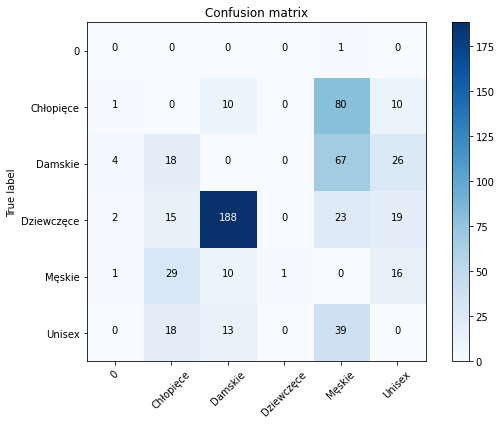

In [14]:
plot_confusion_matrix(types.y, types.x, normalize=False, target_names=sorted(types.x.unique()))

1. All zeros on the diagonal says that the predictor has 0% accuracy.
2. The most common mistake made by classifier is confusing ```Dziewczęce``` and ```Damskie``` class.

# Task 3 

In [15]:
# Constants
IMAGES_DIRECTORY = "images"
IMAGES_EXTENSION = ".jpg"

In [16]:
def get_all_images_paths(directory="images/", extension=".jpg"):
    all_files = list()
    for file in os.listdir(directory):
        if file.endswith(extension):
            all_files.append(file)
    return all_files

In [17]:
all_images = get_all_images_paths()
print(f"There are {len(all_images)} images in dataset.")

There are 365 images in dataset.


In [18]:
def get_all_resolutions(images):
    images_sizes = list()
    for image in images:
        image = PIL.Image.open(image)
        images_sizes.append(image.size)
    return set(images_sizes)
all_images_with_directory = [os.path.join(IMAGES_DIRECTORY, path) for path in get_all_images_paths()]
all_resolutions = get_all_resolutions(all_images_with_directory)
print(f"Unique images resolutions: {', '.join(list(map(str, all_resolutions)))}.")

Unique images resolutions: (400, 511), (400, 447), (400, 510), (400, 446), (400, 473).


In [19]:
def get_image_mean_std(image):
    if isinstance(image, str):
        image = PIL.Image.open(image)
    image = np.array(image) / 255
    mean = [np.mean(image[:, :, i]) for i in range(3)]
    std = [np.std(image[:, :, i]) for i in range(3)]
    return mean, std
get_image_mean_std("images/Y000005365_014_ASOS-.jpg")

([0.7122507881584007, 0.6426055363321799, 0.6014743752402921],
 [0.279827870118352, 0.29854227809734335, 0.31515453240119207])

In [20]:
def get_all_images_stats(images_paths):
    all_stats = dict()
    for path in images_paths:
        img = PIL.Image.open(os.path.join(IMAGES_DIRECTORY, path))
        img_mean, img_std = get_image_mean_std(img)
        all_stats[path] = {
            "mean": img_mean,
            "std": img_std,
        }
    return all_stats
get_all_images_stats(all_images)

{'Y000068606_014_ASOS-.jpg': {'mean': [0.9354453287197232,
   0.9138509034986545,
   0.9184274702037677],
  'std': [0.07161617118377835, 0.12649012404213228, 0.12613582714003388]},
 'Y000001442_014_ASOS-.jpg': {'mean': [0.7531514529701947,
   0.4699570948886955,
   0.5615536832068979],
  'std': [0.20418187107966013, 0.285799155100928, 0.20690541450051056]},
 'Y000125079_014_ASOS-.jpg': {'mean': [0.8782129950019224,
   0.7270821222606692,
   0.7518654555940022],
  'std': [0.08440175362485443, 0.22754505458838184, 0.18748996740667825]},
 'Y000000005_014_ASOS-.jpg': {'mean': [0.7939143214148404,
   0.6780470203767781,
   0.5854667435601691],
  'std': [0.2703683262991803, 0.3095466293699077, 0.32599470180499457]},
 'Y000068585_014_ASOS-.jpg': {'mean': [0.5833340830449828,
   0.573030430603614,
   0.5844078046905037],
  'std': [0.36560275352524324, 0.36844116444491465, 0.35202038186256823]},
 'Y000005324_014_ASOS-.jpg': {'mean': [0.7570951156247255,
   0.6940872021454323,
   0.6459434625868

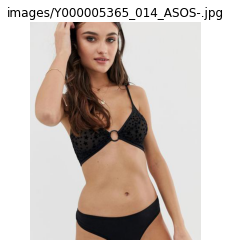

R: 0.71 +/- 0.28
G: 0.64 +/- 0.30
B: 0.60 +/- 0.32


In [21]:
def show_image_stats(image):
    if isinstance(image, str):
        image = PIL.Image.open(image)
    plt.title(image.filename)
    plt.imshow(image)
    plt.axis("off")
    plt.show()
    for color, mean, std in zip(["R", "G", "B"], *get_image_mean_std(image)):
        print(f"{color}: {mean:.2f} +/- {std:.2f}")
show_image_stats("images/Y000005365_014_ASOS-.jpg")

In [22]:
def resize_images(images_paths, size=(256, 256), target_directory="images_256"):
    if not os.path.exists(target_directory):
        os.makedirs(target_directory)
    for path in images_paths:
        img = PIL.Image.open(path)
        filename = img.filename.split("/")[-1]
        img = img.resize(size)
        img.save(os.path.join(target_directory, filename))

resize_images(all_images_with_directory)

In [23]:
def plot_n_random_images(n=4, directory="images/", extension=".jpg", plot_stats=True, target_directory=None):
    def plot_image(target, img_path):
        img = PIL.Image.open(img_path)
        if plot_stats:
            img_mean, img_std = get_image_mean_std(img)
            stats = str()
            for color, mean, std in zip(["R", "G", "B"], img_mean, img_std):
                stats += f"{color}: {mean:.2f}+/-{std:.2f}\n"
        target.imshow(img)
        try:
            target.title(img.filename.split("/")[-1])
            
        except:
            target.set_title(img.filename.split("/")[-1])
            if plot_stats:
                target.text(0.5,-0.3, stats, size=12, ha="center", transform=target.transAxes)
        target.axis("off")
        
    all_files = get_all_images_paths()
    if n == 1:
        path = os.path.join(directory, np.random.choice(all_files))
        print(path)
        plot_image(plt, path)
    else:
        col_n = 2 if n <= 6 else 3
        row_n = int(np.ceil(n / col_n))
        fig, axs = plt.subplots(row_n, col_n, figsize=(6.4 * col_n, 4.8 * row_n))
        if len(axs.shape) == 1:
            axs = [axs]
        choosen_imgs = np.random.choice(all_files, n, replace=False)
        for e, img_path in enumerate(choosen_imgs):
            x, y = np.unravel_index(e, (row_n, col_n))
            plot_image(axs[x][y], os.path.join(directory, img_path))
        for i in range(e + 1, row_n * col_n):
            x, y = np.unravel_index(i, (row_n, col_n))
            axs[x][y].axis('off')
    plt.tight_layout()
    
    if target_directory is not None:
        if not os.path.exists(target_directory):
            os.makedirs(target_directory)
        plt.savefig(os.path.join(target_directory, 'plot.png'))
    
    plt.show()
        

images/Y000005375_014_ASOS-.jpg


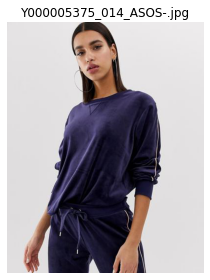

In [24]:
plot_n_random_images(1)

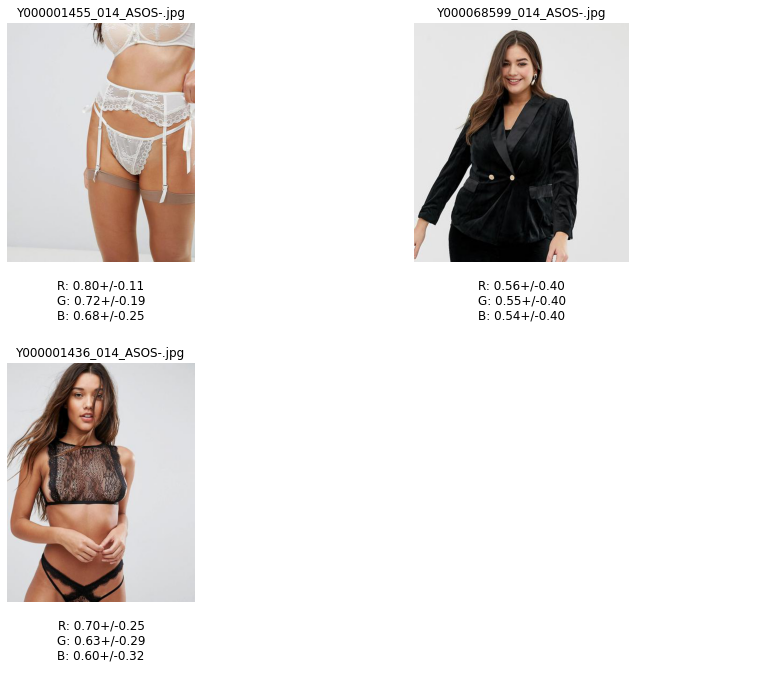

In [25]:
plot_n_random_images(3)

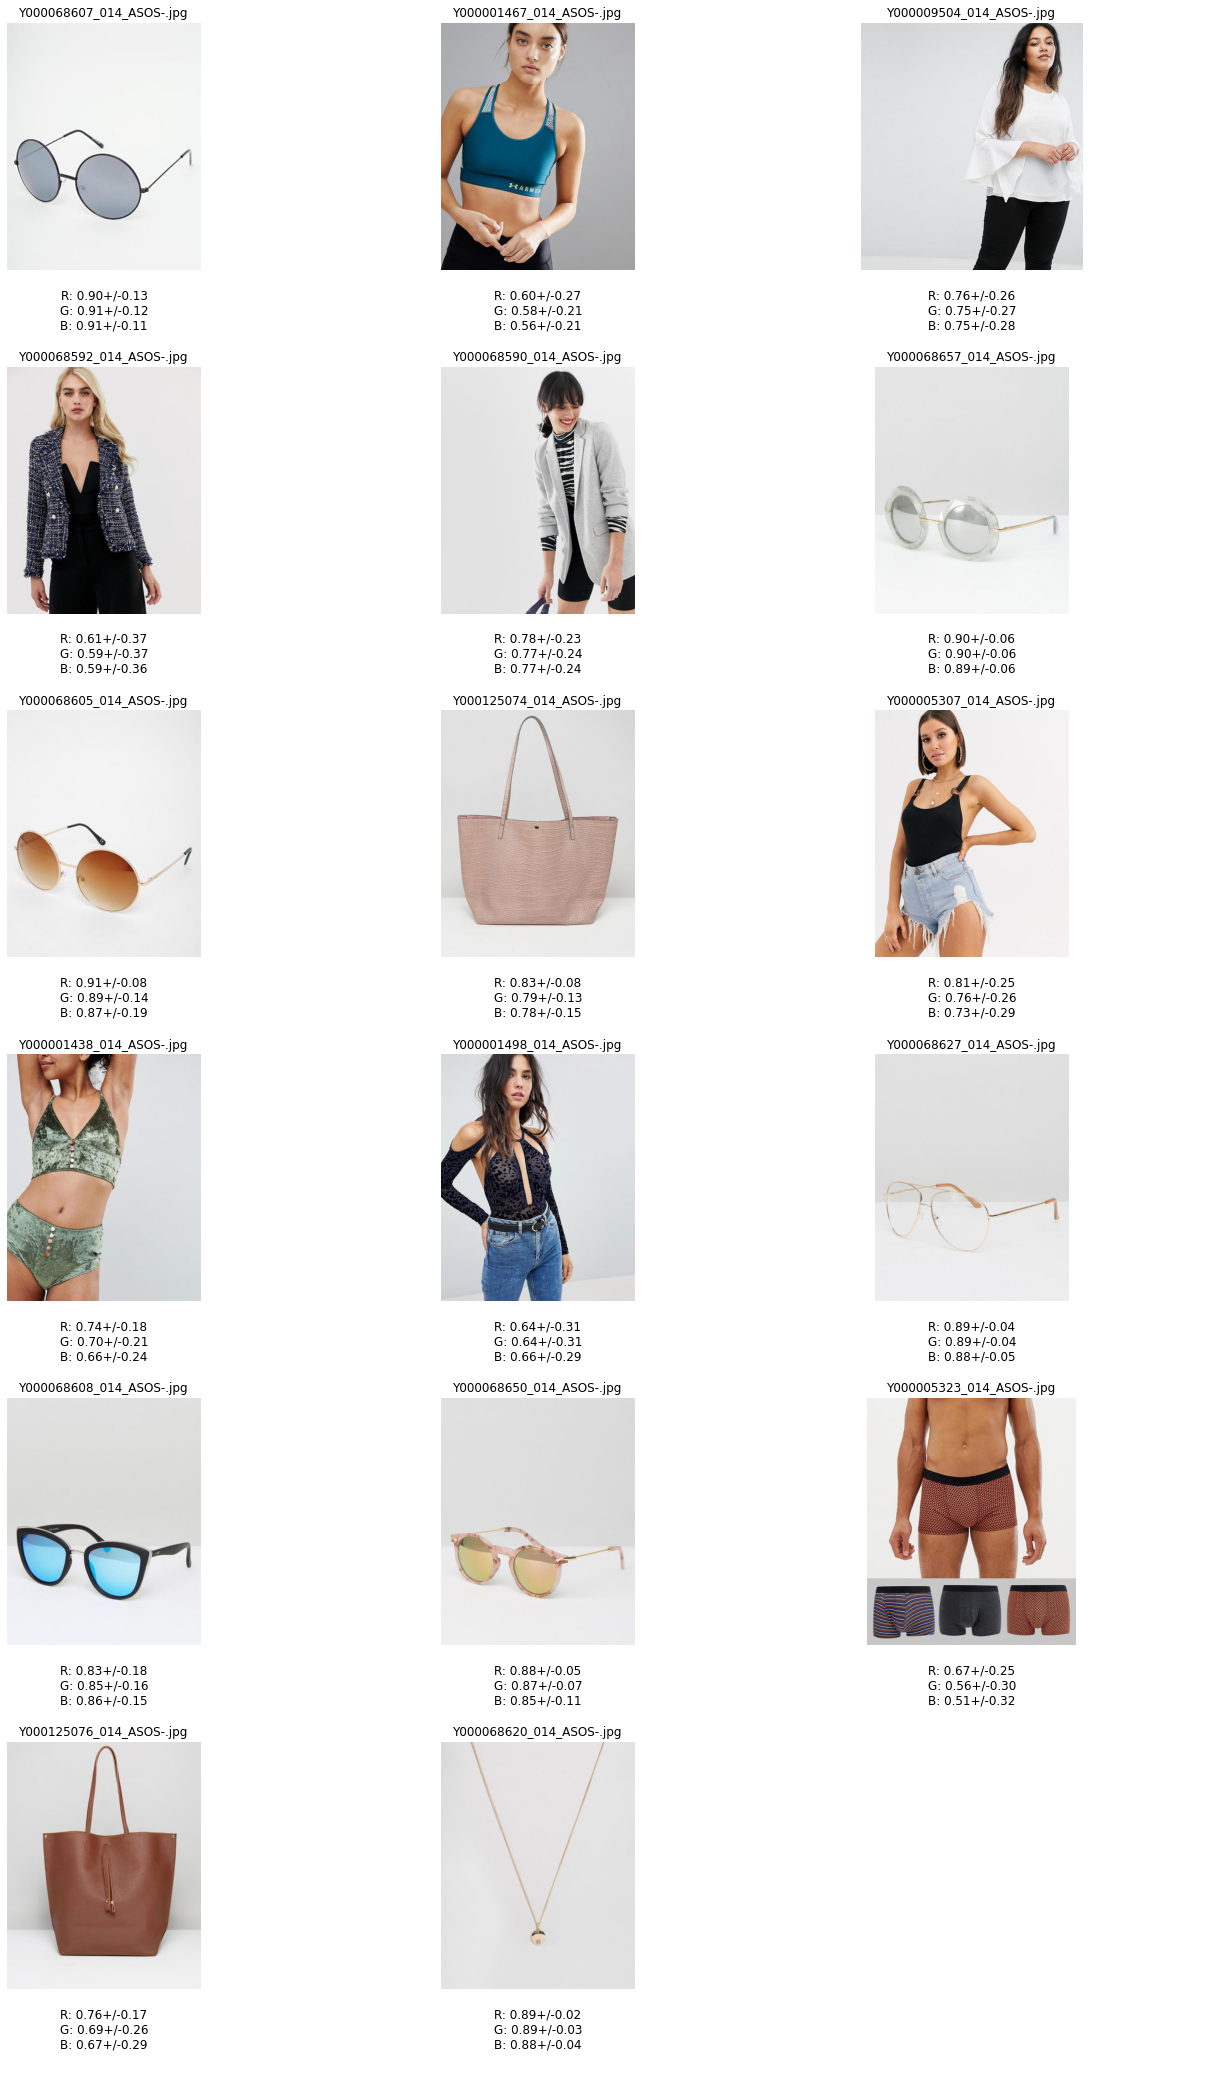

In [26]:
plot_n_random_images(17, target_directory='visualisations')